Program that tells whether the picture is one of Zooey Deschannel or Katy Perry.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [3]:
bs = 16

In [4]:
relative = Path("images")
absolute = relative.absolute()
absolute

WindowsPath('C:/Users/Phons/course-v3/nbs/dl1/images')

In [5]:
absolute.ls()

[WindowsPath('C:/Users/Phons/course-v3/nbs/dl1/images/download_images'),
 WindowsPath('C:/Users/Phons/course-v3/nbs/dl1/images/notebook_tutorial'),
 WindowsPath('C:/Users/Phons/course-v3/nbs/dl1/images/trial_1')]

In [6]:
path_img = absolute/'trial_1'; path_img

WindowsPath('C:/Users/Phons/course-v3/nbs/dl1/images/trial_1')

In [7]:
tfms = get_transforms(do_flip=False)

In [8]:
np.random.seed(40) # so that validation set remains the same for all trials
data = ImageDataBunch.from_folder(path_img, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, bs=bs,  num_workers=4).normalize(imagenet_stats)


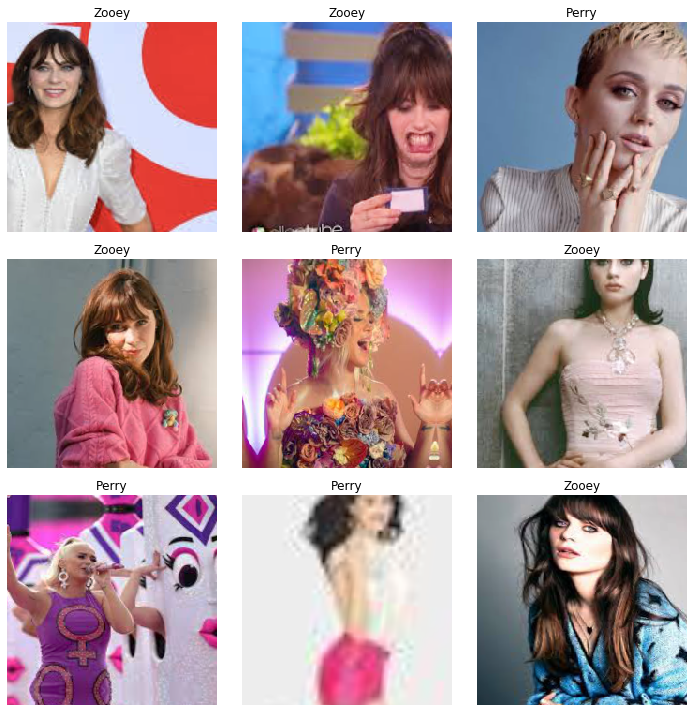

In [9]:
data.show_batch(rows=3, figsize=(10,10))

In [10]:
print(data.classes)
len(data.classes), data.c

['Perry', 'Zooey']


(2, 2)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learn.fit_one_cycle(8, max_lr=0.02)

epoch,train_loss,valid_loss,error_rate,time
0,0.630647,0.372182,0.083333,00:31
1,0.637240,2.881095,0.416667,00:35
2,0.758211,1.522718,0.250000,00:37
3,0.721960,0.644119,0.152778,00:41
4,0.859600,0.673132,0.125000,00:38
5,0.809306,0.305068,0.083333,00:38
6,0.623782,0.133294,0.069444,00:40
7,0.518166,0.144498,0.069444,00:38


In [14]:
learn.save('stage1')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

In [16]:
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

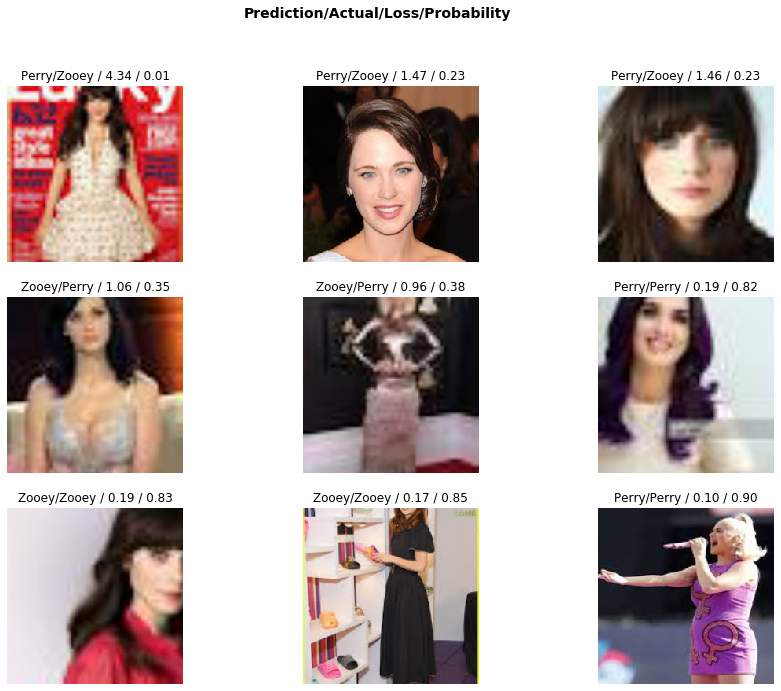

In [17]:
interp.plot_top_losses(9, figsize =(15,11))

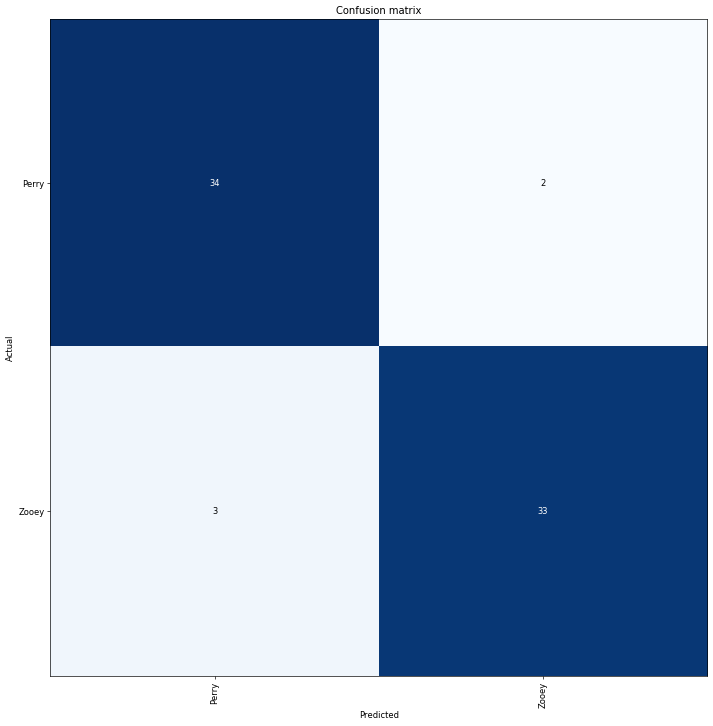

In [18]:
interp.plot_confusion_matrix(figsize = (12,12), dpi=60)